# **Part I: Exploratory data analysis (EDA)**


## **1. Importing the libraries and the data**

In [ ]:
pip install pandas

In [ ]:
pip install openpyxl

In [67]:
# Import the libraries
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
rfm = pd.read_excel('ecommerce retail.xlsx', sheet_name='ecommerce retail')

# Display the first few rows of the dataframe
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **2. Explanatory Data Analysis (EDA)**

### **2.1. Check null values and data type**

In [68]:
# Check null values and data type
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [69]:
# Checking missing values in each column
missing_values = rfm.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values) ## CustomerID has 135080 null values => drop them

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [70]:
# Dropping rows where CustomerID is null
rfm_cleaned = rfm.dropna(subset=['CustomerID'])

# Checking missing values in each column again
rfm_cleaned.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### **2.2. Get summary statistics**

In [71]:
# Get summary statistics
rfm_stats = rfm_cleaned[['Quantity', 'UnitPrice', 'CustomerID']].describe()
rfm_stats ## as same as the summary statistics output in Slide 4 (Training 6)

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### **2.3. Correcting data type and filtering data**

#### **2.3.1 Correcting data type**

In [72]:
# Converting 'CustomerID' to 'int64'
rfm_cleaned['CustomerID'] = rfm_cleaned['CustomerID'].astype('int64')

# Converting InvoiceDate to 'date' format
rfm_cleaned['InvoiceDate'] = rfm_cleaned['InvoiceDate'].dt.date

# Displaying the data types to confirm changes
rfm_cleaned.info()
rfm_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


/var/folders/kp/y63ytpms04n2q77cfm7wcnxw0000gn/T/ipykernel_3976/2307473738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['CustomerID'] = rfm_cleaned['CustomerID'].astype('int64')
/var/folders/kp/y63ytpms04n2q77cfm7wcnxw0000gn/T/ipykernel_3976/2307473738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['InvoiceDate'] = rfm_cleaned['InvoiceDate'].dt.date


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


#### **2.3.2 Filtering data**

In [73]:
# Filtering the dataframe where Quantity > 0 
rfm_filtered = rfm_cleaned[(rfm_cleaned['Quantity'] > 0) ] # không filter 'UnitPrice > 0' thì kết quả RFM score bên dưới mới giống Slide 10 của Training 6 được

# Displaying the first few rows to confirm the filtering
rfm_filtered.head()
rfm_filtered.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


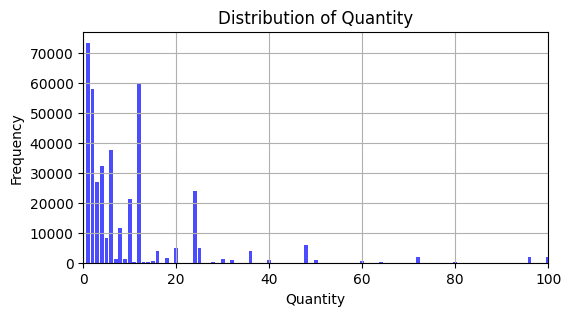

In [74]:
# Plotting the distribution of 'Quantity'

# Calculating the frequency of each unique Quantity value
quantity_counts = rfm_filtered['Quantity'].value_counts().sort_index()

# Plotting the bar chart for Quantity
plt.figure(figsize=(6, 3))
plt.bar(quantity_counts.index, quantity_counts.values, color='blue', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Narrowing the x-axis range for better visibility; adjust as needed
plt.grid(True)
plt.show()


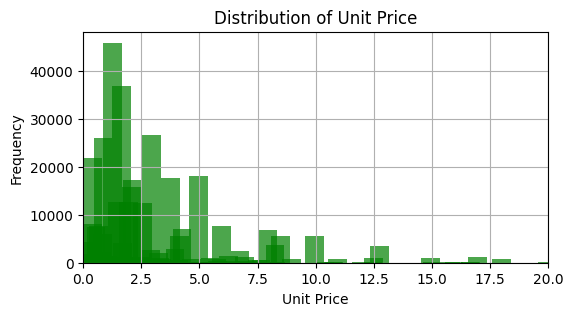

In [75]:
# Plotting the distribution of 'UnitPrice'

# Calculating the frequency of each unique UnitPrice value
unit_price_counts = rfm_filtered['UnitPrice'].value_counts().sort_index()

# Plotting the bar chart for UnitPrice
plt.figure(figsize=(6, 3))
plt.bar(unit_price_counts.index, unit_price_counts.values, color='green', alpha=0.7)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Narrowing the x-axis range for better visibility; adjust as needed
plt.grid(True)
plt.show()

-------------------------------------------------------------

# **Part II: Calculating RFM (Recency – Frequency – Monetary) Score**

To create an RFM (Recency, Frequency, Monetary) model, we'll calculate three key metrics for each customer:

- **Recency**: How recently a customer made a purchase.
    Calculate the number of days between the present date (assuming that the present date were **30 December 2011**) and the date of the last purchase for each customer.
    
- **Frequency**: How often a customer makes a purchase.
    Calculate the number of orders for each customer.
    
- **Monetary**: How much money a customer spends on purchases.
    Calculate the sum of purchase prices for each customer.

## **1. Calculating Recency – Frequency – Monetary**

In [76]:
# Calculating 'Recency' for each customer

from datetime import datetime

# Define the present date for recency calculation
current_date = datetime(2011, 12, 30)  # Assuming the present date is December 30, 2011

# Calculate Recency for each customer
# Group by 'CustomerID' and find the maximum (most recent) 'InvoiceDate'
recency = rfm_filtered.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Calculate the number of days between the present date and the last purchase date
recency['Recency'] = recency['InvoiceDate'].apply(lambda x: (current_date.date() - x).days)

# Keep only 'CustomerID' and 'Recency' columns
recency = recency[['CustomerID', 'Recency']]
recency

,CustomerID,Recency
0,12346,346
1,12347,23
2,12348,96
3,12349,39
4,12350,331
...,...,...
4334,18280,298
4335,18281,201
4336,18282,28
4337,18283,24


In [77]:
# Calculate 'Frequency' for each customer

# Group by 'CustomerID' and count the number of unique 'InvoiceNo' (orders)
frequency = rfm_filtered.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the columns
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()



,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [78]:
# Calculate 'Monetary' for each customer

# Calculate the total price for each transaction
rfm_filtered['TotalPrice'] = rfm_filtered['Quantity'] * rfm_filtered['UnitPrice']

# Group by 'CustomerID' and sum the 'TotalPrice'
monetary = rfm_filtered.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Rename the columns
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

/var/folders/kp/y63ytpms04n2q77cfm7wcnxw0000gn/T/ipykernel_3976/1480722366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_filtered['TotalPrice'] = rfm_filtered['Quantity'] * rfm_filtered['UnitPrice']


,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [79]:
# Merging Recency, Frequency, and Monetary DataFrames

# Merge 'recency' and 'frequency' DataFrames on 'CustomerID'
rfm_merged = recency.merge(frequency, on='CustomerID')

# Merge the result with the 'monetary' DataFrame on 'CustomerID'
rfm_merged = rfm_merged.merge(monetary, on='CustomerID')

# Display the merged RFM DataFrame
rfm_merged

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12347,23,7,4310.00
2,12348,96,4,1797.24
3,12349,39,1,1757.55
4,12350,331,1,334.40
...,...,...,...,...
4334,18280,298,1,180.60
4335,18281,201,1,80.82
4336,18282,28,2,178.05
4337,18283,24,16,2094.88


## **2. Calculating Recency – Frequency – Monetary scores**

In [80]:
# Rank Recency in ascending order 
rfm_merged['Recency_Rank'] = rfm_merged['Recency'].rank(method='first', ascending=True)

# Rank Frequency in descending order 
rfm_merged['Frequency_Rank'] = rfm_merged['Frequency'].rank(method='first', ascending=True)

# Rank Monetary in descending order 
rfm_merged['Monetary_Rank'] = rfm_merged['Monetary'].rank(method='first', ascending=True)

# Apply qcut on the ranked columns to create R, F, M scores with correct order
rfm_merged['R_score'] = pd.qcut(rfm_merged['Recency_Rank'], 5, labels=[5, 4, 3, 2, 1])    # lower is better
rfm_merged['F_score'] = pd.qcut(rfm_merged['Frequency_Rank'], 5, labels=[1, 2, 3, 4, 5])  # higher is better
rfm_merged['M_score'] = pd.qcut(rfm_merged['Monetary_Rank'], 5, labels=[1, 2, 3, 4, 5])   # higher is better

# Combine R, F, and M scores into a single RFM Score
rfm_merged['RFM_Score'] = rfm_merged['R_score'].astype(str) + rfm_merged['F_score'].astype(str) + rfm_merged['M_score'].astype(str)

# Display the updated DataFrame
rfm_merged = rfm_merged[['CustomerID', 'Frequency', 'Monetary', 'Recency', 'R_score', 'F_score', 'M_score', 'RFM_Score']]
rfm_merged


,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,1,77183.60,346,1,1,5,115
1,12347,7,4310.00,23,5,5,5,555
2,12348,4,1797.24,96,2,4,4,244
3,12349,1,1757.55,39,4,1,4,414
4,12350,1,334.40,331,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121
4335,18281,1,80.82,201,1,2,1,121
4336,18282,2,178.05,28,5,3,1,531
4337,18283,16,2094.88,24,5,5,5,555


## **3. Joining the RFM dataframe with Segment**

In [81]:
# Load the 'Segmentation' sheet from the Excel file
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')

# Display the first few rows of the dataframe
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [82]:
# Convert the comma-separated string in 'RFM_Score' column to a list of RFM scores
seg['RFM Score'] = seg['RFM Score'].str.split(', ')

# Use explode() to transform each element of a list-like to a row
seg = seg.explode('RFM Score').reset_index(drop=True)
seg


,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
119,Lost customers,112
120,Lost customers,121
121,Lost customers,131
122,Lost customers,141


In [84]:
# Merge the 'seg' DataFrame with 'rfm_merged' on the 'RFM Score' column
rfm_final = rfm_merged.merge(seg, left_on='RFM_Score', right_on='RFM Score', how='left')

# Display the updated DataFrame with segments
rfm_final = rfm_final[['CustomerID', 'Frequency', 'Monetary', 'Recency', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Segment']]
rfm_final ## Our final output is here


,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12347,7,4310.00,23,5,5,5,555,Champions
2,12348,4,1797.24,96,2,4,4,244,At Risk
3,12349,1,1757.55,39,4,1,4,414,Promising
4,12350,1,334.40,331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121,Lost customers
4335,18281,1,80.82,201,1,2,1,121,Lost customers
4336,18282,2,178.05,28,5,3,1,531,Potential Loyalist
4337,18283,16,2094.88,24,5,5,5,555,Champions


In [86]:
# Export the DataFrame to a CSV file
rfm_final.to_csv('rfm_segments.csv', index=False)

In [91]:
# Export DataFrame to Excel
rfm_final.to_excel('rfm_segments.xlsx', index=False)

# **Part III: Visualizations & Insights**

## **1. Histogram (distribution of 'Recency', 'Frequency', & 'Monetary')**

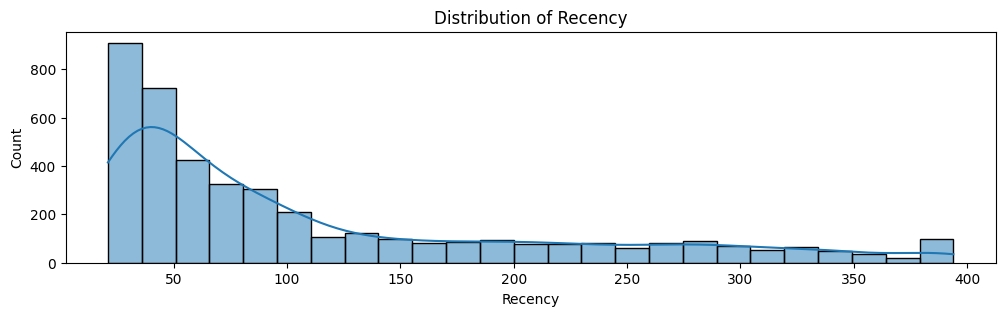

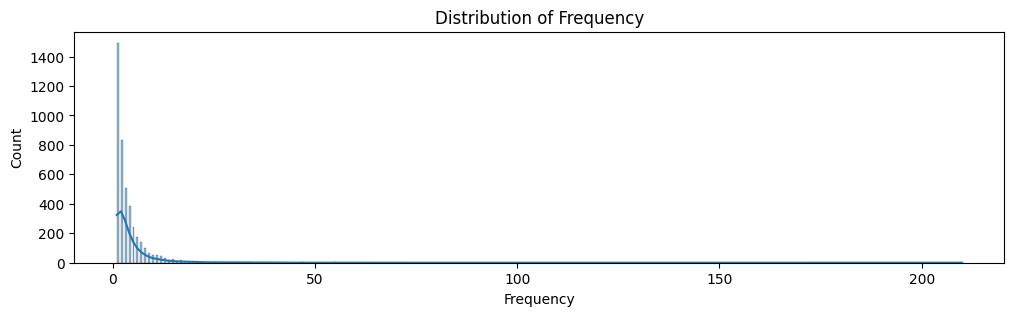

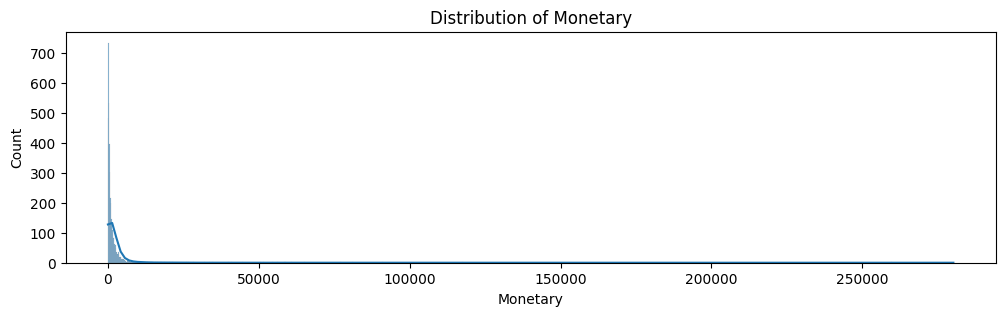

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
colnames = ['Recency', 'Frequency', 'Monetary']

# Plotting the distributions of Recency, Frequency, and Monetary
for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(rfm_final[col], kde=True, ax=ax)  # Use sns.histplot instead of sns.distplot
    ax.set_title(f'Distribution of {col}')
    plt.show()

## **2. Treemap**
### - Segment by customers
### - Segment by total sales

In [ ]:
pip install squarify

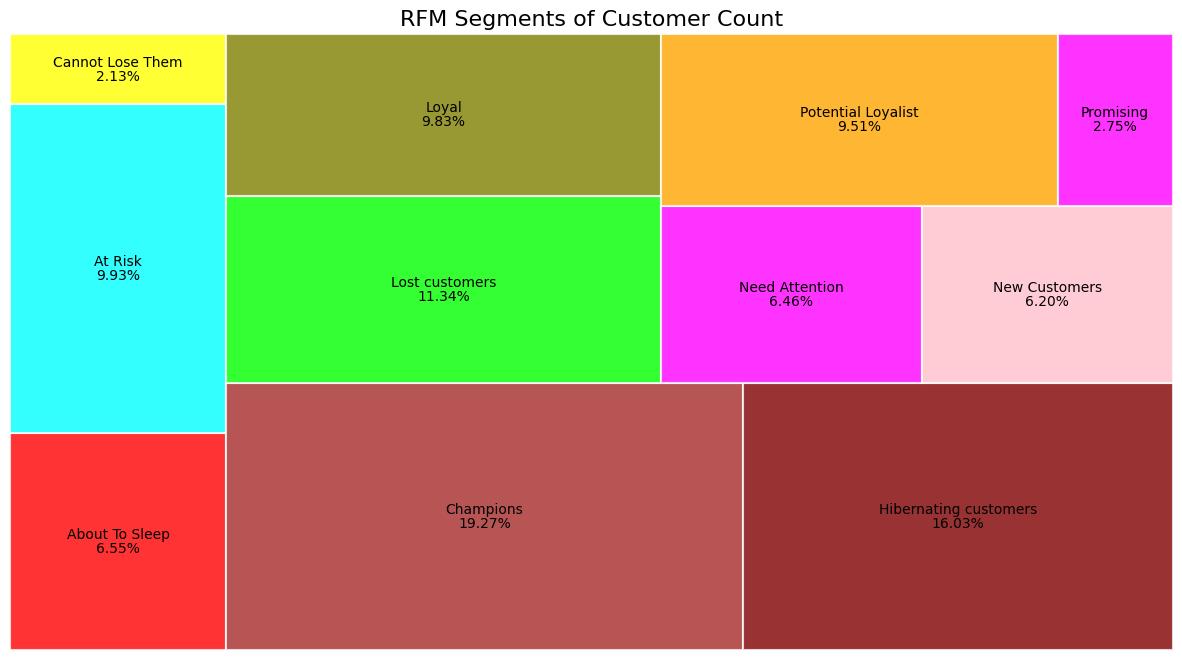

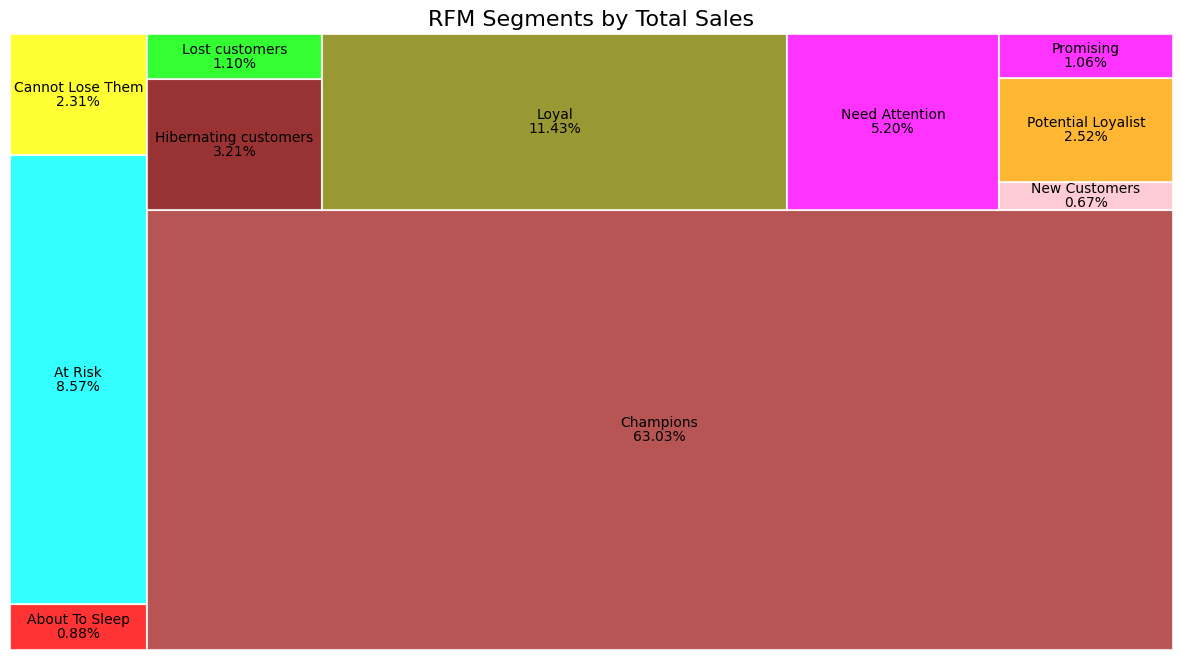

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Assuming 'rfm_final' is the DataFrame containing the RFM analysis results

# Group by Segment and calculate the number of customers and total sales
grp = rfm_final.groupby('Segment').agg(
    Cust_count=('CustomerID', 'count'),
    Total_sales=('Monetary', 'sum')
).reset_index()

# Define colors for the treemap
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800000', 
          '#00FF00', '#808000', '#FF00FF', '#FFC0CB', '#FFA500', 
          '#FF00FF', '#736F6E']

# Treemap by Customer Count
fig, ax = plt.subplots(1, figsize=(15, 8))
squarify.plot(
    sizes=grp['Cust_count'],
    label=grp['Segment'],
    value=[f'{x*100/grp["Cust_count"].sum():.2f}%' for x in grp['Cust_count']],
    alpha=0.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor="white")
)
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

# Treemap by Total Sales
fig, ax = plt.subplots(1, figsize=(15, 8))
squarify.plot(
    sizes=grp['Total_sales'],
    label=grp['Segment'],
    value=[f'{x*100/grp["Total_sales"].sum():.2f}%' for x in grp['Total_sales']],
    alpha=0.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor="white")
)
plt.title('RFM Segments by Total Sales', fontsize=16)
plt.axis('off')
plt.show()


In [97]:
# Group by 'Segment' and calculate the mean of Recency, Frequency, and Monetary
segment_summary = rfm_final.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
segment_summary = segment_summary.round(2)
segment_summary

,Segment,Recency,Frequency,Monetary
0,About To Sleep,106.94,1.29,275.62
1,At Risk,163.33,3.76,1775.79
2,Cannot Lose Them,255.62,2.36,2231.79
3,Champions,31.77,12.13,6723.22
4,Hibernating customers,169.52,1.56,411.34
5,Lost customers,295.77,1.07,200.29
6,Loyal,56.64,5.33,2389.44
7,Need Attention,53.97,3.11,1655.98
8,New Customers,48.84,1.07,222.97
9,Potential Loyalist,46.98,2.52,545.76


In [98]:
# Customer count and Total Sales by Segment
grp

,Segment,Cust_count,Total_sales
0,About To Sleep,283,78001.540
1,At Risk,429,761813.911
2,Cannot Lose Them,92,205324.720
3,Champions,833,5600439.880
4,Hibernating customers,693,285061.932
5,Lost customers,490,98140.490
6,Loyal,425,1015513.330
7,Need Attention,279,462019.791
8,New Customers,268,59755.620
9,Potential Loyalist,411,224305.340


## **3. Insights & Recommendations**

Based on above analyses, actionable insights for the Marketing teams are as follows.

#### **3.1. Segment analysis:**

| Segment                | Customer_count | Total_sales    | Recency | Frequency | Monetary |
|------------------------|------------|----------------|---------|-----------|----------|
| Champions              | 833        | 5,600,439.88   | 31.77   | 12.13     | 6723.22  |
| Loyal                  | 425        | 1,015,513.33   | 56.64   | 5.33      | 2389.44  |
| Cannot Lose Them       | 92         | 205,324.72     | 255.62  | 2.36      | 2231.79  |
| At Risk                | 429        | 761,813.91     | 163.33  | 3.76      | 1775.79  |
| Hibernating customers  | 693        | 285,061.93     | 169.52  | 1.56      | 411.34   |
| Lost customers         | 490        | 98,140.49      | 295.77  | 1.07      | 200.29   |
| Promising              | 119        | 94,394.46      | 46.18   | 1.27      | 793.23   |
| Potential Loyalist     | 411        | 224,305.34     | 46.98   | 2.52      | 545.76   |
| Need Attention         | 279        | 462,019.79     | 53.97   | 3.11      | 1655.98  |
| About To Sleep         | 283        | 78,001.54      | 106.94  | 1.29      | 275.62   |
| New Customers          | 268        | 59,755.62      | 48.84   | 1.07      | 222.97   |


#### **3.2. Insights and recommendations:**

| Segment               | Insights                                               |
|-----------------------|--------------------------------------------------------|
| Champions             | Top segment, highest revenue, frequent high-value purchases. |
| Loyal                 | Consistently engaged and valuable.                     |
| Cannot Lose Them      | High-value customers at risk of disengagement.         |
| At Risk               | Valuable but showing signs of decreased engagement.    |
| Hibernating customers | Low engagement and infrequent purchases.               |
| Lost customers        | Very low engagement, high risk of churn.               |
| Promising             | Potential for growth into more valuable segments.      |
| Potential Loyalist    | Recent engagement, potential for higher loyalty.       |
| Need Attention        | Still engaged but could decline without action.        |
| About To Sleep        | Low engagement, infrequent purchases.                  |
| New Customers         | New to the business, low frequency and monetary value currently. |



Based on above results, **Frequency (F)** should be prioritized for SuperStore because:

1. **Champions and Loyal** have the highest Frequency (12.13 and 5.33 times) and contribute the most to total sales. Increasing Frequency in these groups will maximize revenue.

2. **Cannot Lose Them and At Risk** have lower Frequency (2.36 and 3.76 times) but high spending. Boosting Frequency will help retain these customers and increase sales.

3. **Potential segments like Promising and Potential Loyalist** have low Frequency but can be developed into more loyal customers with campaigns aimed at increasing Frequency.

### Actions:
- Implement loyalty programs and special promotions to encourage frequent purchases.
- Offer exclusive benefits for Champions and Loyal customers to maintain high purchase Frequency.